In [140]:
import numpy as np
import cv2
import matplotlib as plt

from utils.optical_flow_metrics import compute_msen, read_flow_data
from utils.optical_flow_plot import plot_opticalflow_bm, plot_opticalflow_gt, read_opticalflow, read_sequences
from utils.plotting import create_folder
from block_matching import block_matching_optical_flow

%matplotlib inline  
%config InlineBackend.figure_format = 'retina'

sequences_path = '../datasets/data_stereo_flow/training/image_0/'

gt_path = '../datasets/data_stereo_flow/training/flow_noc/'
gt_noc = "../datasets/data_stereo_flow/training/flow_noc/000045_10.png"

opticalflow_path = '../datasets/results_opticalflow_kitti/results/'
test = "../datasets/results_opticalflow_kitti/results/LKflow_000045_10.png"

save_path = 'plots/'


# Task 1.1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(375, 1241, 3)


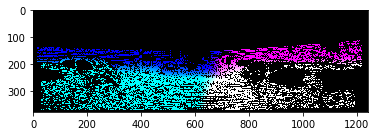

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


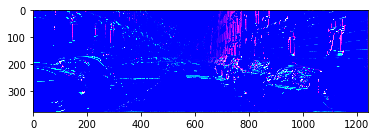

In [4]:
sequences = read_sequences(sequences_path)
flow_gt, flow_test = read_flow_data(gt_noc, test)

# Task 1.2

In [5]:
from itertools import product

block_size = [8, 16]
search_area = [4]
step_size = [16]
error_function=['SSD', 'MSD', 'SAD']

for bs, sa, ss, ef in list(product(block_size, search_area, step_size, error_function)):
    print("{} {} {} {}".format(bs, sa, ss, ef))


8 4 16 SSD
8 4 16 MSD
8 4 16 SAD
16 4 16 SSD
16 4 16 MSD
16 4 16 SAD


In [6]:
frame1 = cv2.imread("../datasets/data_stereo_flow/training/image_0/000045_10.png")
prvs = cv2.cvtColor(frame1,cv2.COLOR_BGR2GRAY)
hsv = np.zeros_like(frame1)
hsv[...,1] = 255

frame2 = cv2.imread("../datasets/data_stereo_flow/training/image_0/000045_11.png")
next = cv2.cvtColor(frame2,cv2.COLOR_BGR2GRAY)

flow = cv2.calcOpticalFlowFarneback(prvs, next, None, 0.5, 3, 15, 3, 5, 1.2, 0)
mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])
hsv[...,0] = ang*180/np.pi/2
hsv[...,2] = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)
bgr = cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)
cv2.imwrite('opticalhsv.png',bgr)
prvs = next
    
cv2.destroyAllWindows()

In [7]:
opticalflow = block_matching_optical_flow(sequences[0], sequences[1], block_size=bs, search_area=sa, step_size=ss, error_function=ef, compensation='Forward')



Time: 25.77178645700002


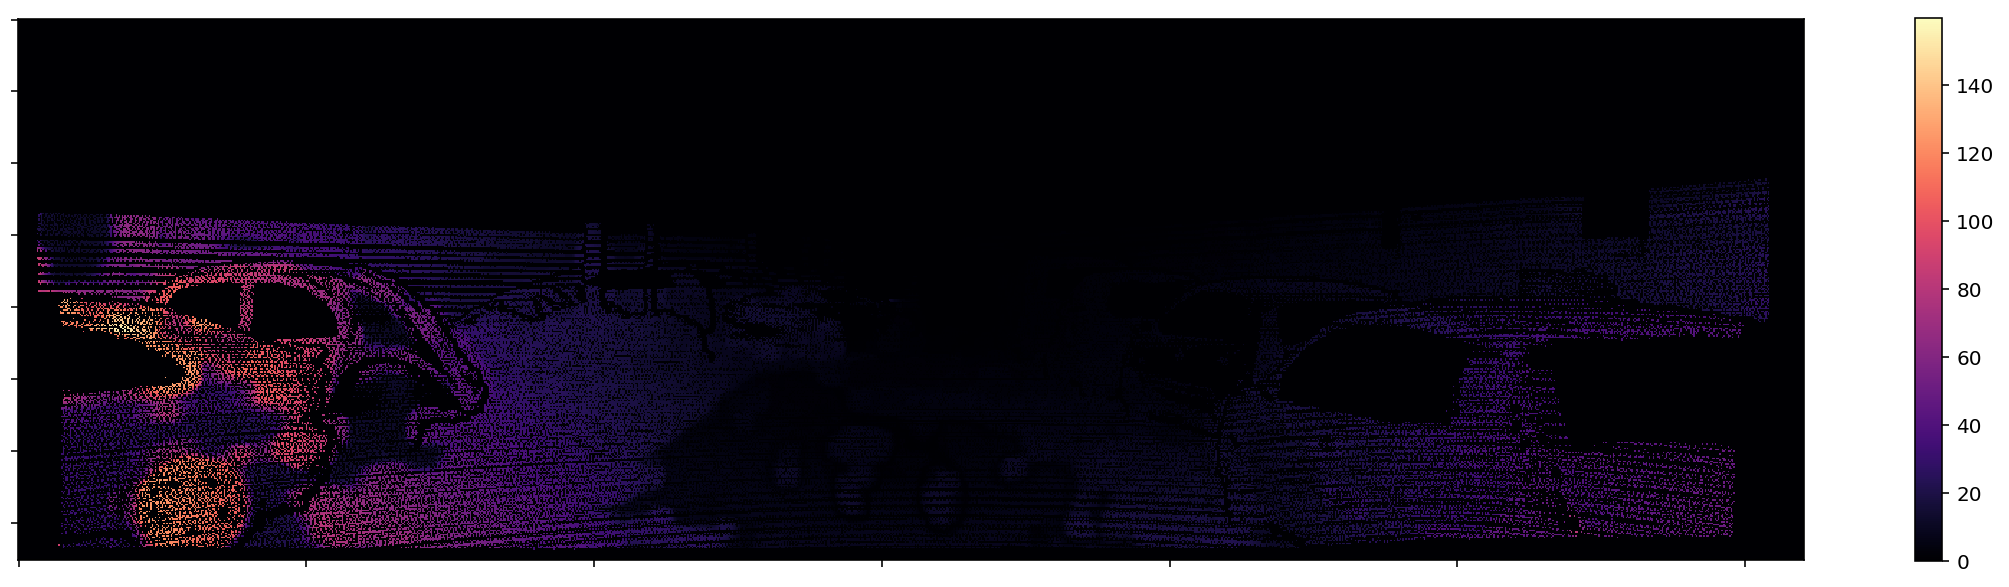

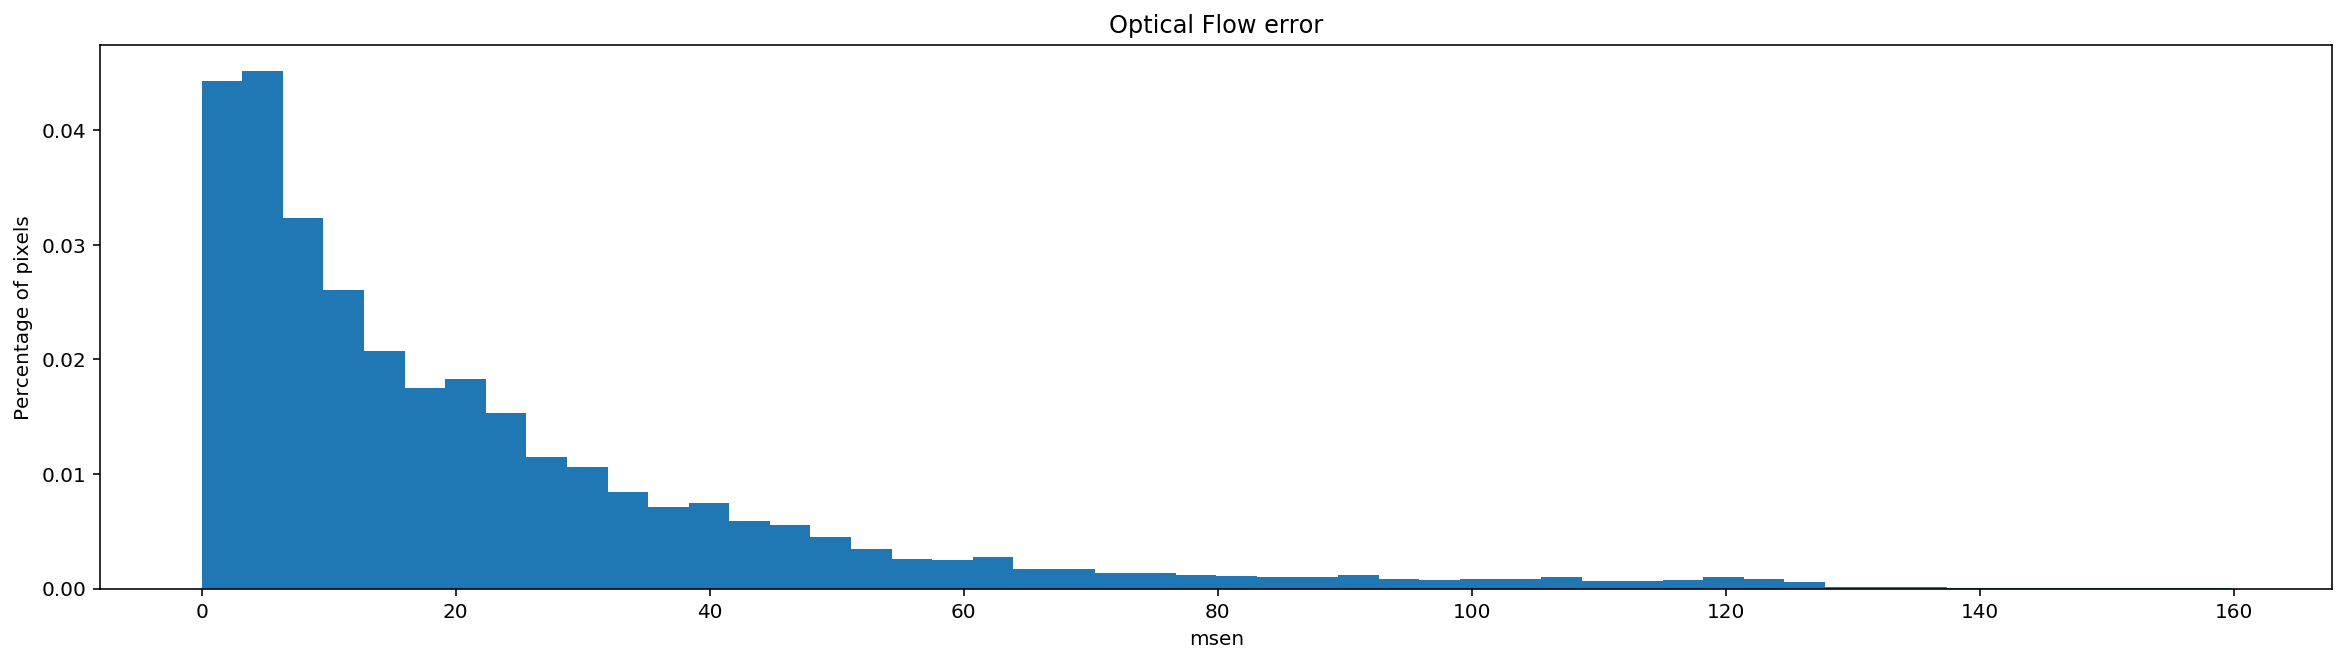

MSEN: 22.299967353675548
PEPN: 86.9903191795265


In [175]:
msen, pepn = compute_msen(flow_gt, bgr)
print("MSEN: {}".format(msen))
print("PEPN: {}".format(pepn))

In [9]:
frame.shape

NameError: name 'frame' is not defined

In [169]:
output = []
for row in np.arange(20,360,1):
    for col in np.arange(20,1240,1):
        output.append([col, row])
        
aaa = np.float32(np.transpose(np.array([output]), (1,0,2)))
aaa.shape

# params for ShiTomasi corner detection
#feature_params = dict( maxCorners = 81º,
#                       qualityLevel = 0.3,
#                       minDistance = 7,
#                       blockSize = 7)

# Parameters for lucas kanade optical flow
lk_params = dict( winSize  = (15,15),
                  maxLevel = 2,
                  criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))


# Create some random colors
color = np.random.randint(0,255,(1000000,3))
# Take first frame and find corners in it
old_frame = cv2.imread("../datasets/data_stereo_flow/training/image_0/000045_10.png")
old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
#p0 = cv2.goodFeaturesToTrack(old_gray, mask = None, **feature_params)
# Create a mask image for drawing purposes
mask = np.zeros_like(old_frame)

frame = cv2.imread("../datasets/data_stereo_flow/training/image_0/000045_11.png")
frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
# calculate optical flow
#p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)
p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, aaa, None, **lk_params)

# Select good points
good_new = p1[st==1]
good_old = aaa[st==1]

# draw the tracks
for i,(new,old) in enumerate(zip(good_new,good_old)):
    a,b = new.ravel()
    c,d = old.ravel()
    mask = cv2.line(mask, (a,b),(c,d), color[i].tolist(), 2)
    frame = cv2.circle(frame,(a,b),5,color[i].tolist(),-1)
img = cv2.add(frame,mask)
cv2.imwrite('frame.png',img)


True

In [170]:
mask = np.zeros_like(old_frame)
for i,(new,old) in enumerate(zip(good_new,good_old)):
    a,b = new.ravel()
    row_c,col_d = old.ravel()
    #print(a,b,row_c,col_d)
    mask[int(col_d),int(row_c),0] = row_c - a
    mask[int(col_d),int(row_c),1] = col_d - b
    

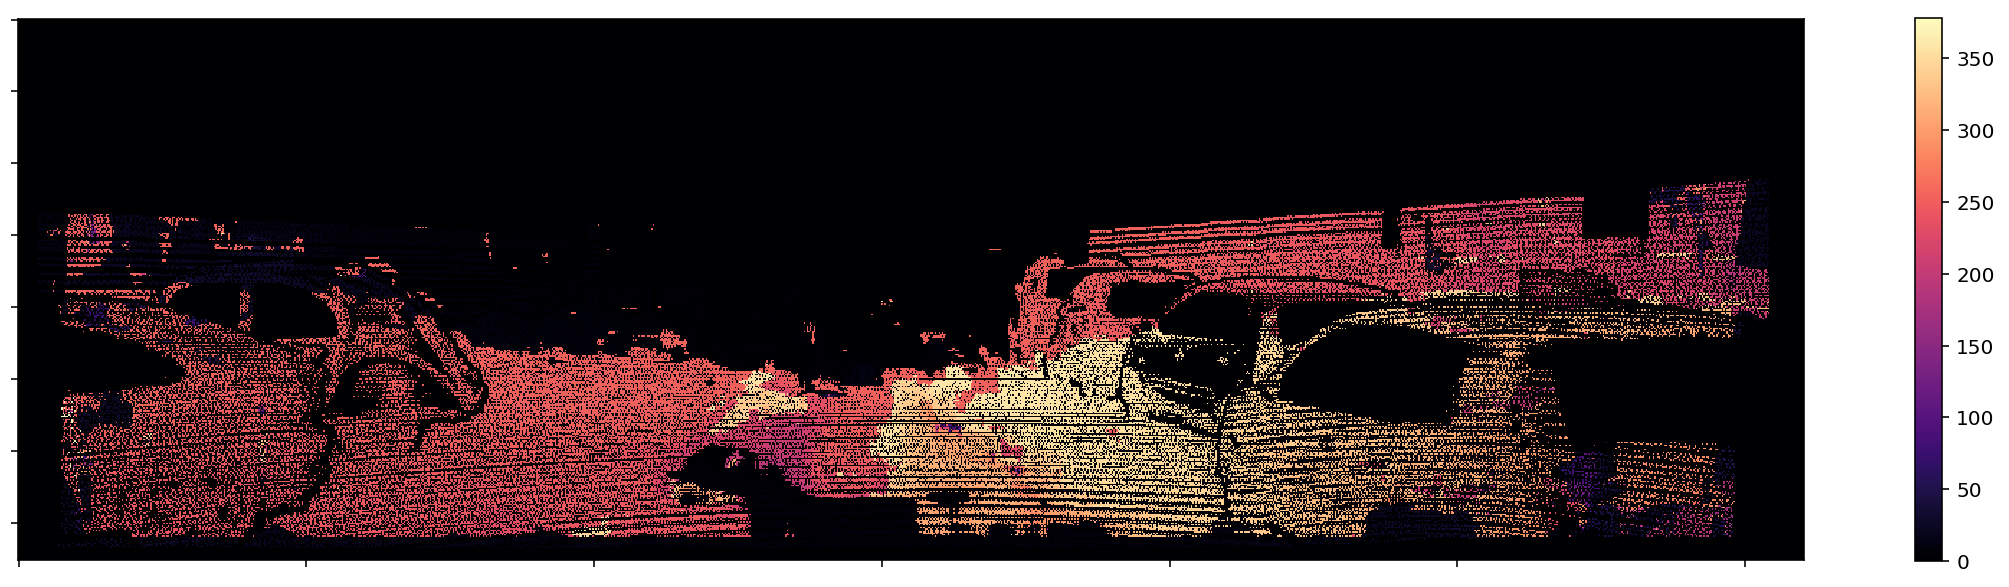

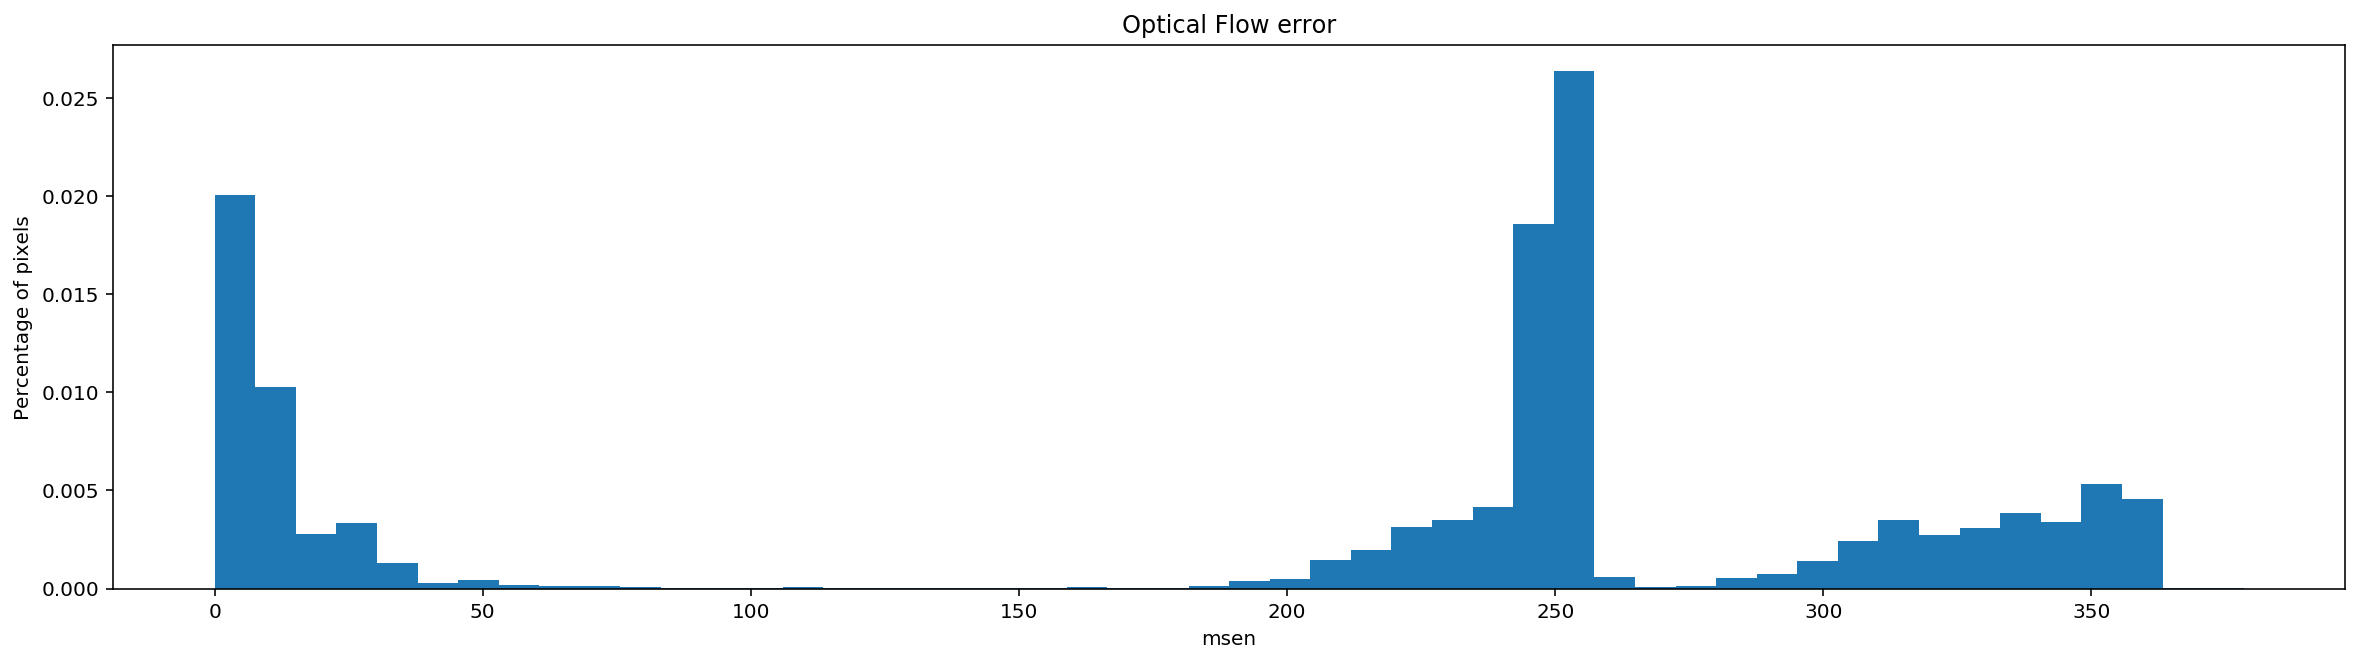

MSEN: 196.0260795604507
PEPN: 93.97967986197642


In [176]:
msen, pepn = compute_msen(flow_gt, mask)
print("MSEN: {}".format(msen))
print("PEPN: {}".format(pepn))

In [ ]:
p0.shape

(103700, 1, 2)

In [27]:
xs, ys = np.meshgrid(np.arange(100), np.arange(40))
xys1 = np.dstack([xs, ys])

# Plots

In [17]:
with open("block_matching_values.txt", "r") as f:
    data = f.readlines()


Block size: 4, search area: 2, step size: 2, error function: SSD

Time: 55.20433442000649

MSEN: 11.215249256496353

PEPN: 86.91651490462954

Block size: 4, search area: 2, step size: 2, error function: MSD

Time: 96.77446507199784

MSEN: 11.215249256496353

PEPN: 86.91651490462954

Block size: 4, search area: 2, step size: 2, error function: SAD

Time: 62.66846520299441

MSEN: 11.328216322132418

PEPN: 88.19610850186906

Block size: 4, search area: 2, step size: 4, error function: SSD

Time: 19.878001271994435

MSEN: 11.170158071637058

PEPN: 84.97364133039395

Block size: 4, search area: 2, step size: 4, error function: MSD

Time: 28.003097428998444

MSEN: 11.170158071637058

PEPN: 84.97364133039395

Block size: 4, search area: 2, step size: 4, error function: SAD

Time: 18.980028799996944

MSEN: 11.189751062273679

PEPN: 85.11837438895812

Block size: 4, search area: 2, step size: 16, error function: SSD

Time: 6.472036666993517

MSEN: 11.64066869272435

PEPN: 88.91018882392409

Blo

In [157]:
i = 0
method = []
block_size = []
search_area = []
step_size = [] 
error_function = []
time = []
MSEN = []
PEPN = []

with open("block_matching_values.txt", "r") as f:
    data = f.readlines()

for line in data:
    if line.startswith("B"):
        method.append("Forward")
        splited_line = line.split(" ")
        block_size.append(int(splited_line[2][:-1]))
        search_area.append(int(splited_line[5][:-1]))
        step_size.append(int(splited_line[8][:-1]))
        error_function.append(splited_line[11][:-1])
    if line.startswith("T"):
        splited_line = line.split(" ")
        time.append(float(splited_line[1][:-1]))
    if line.startswith("M"):
        splited_line = line.split(" ")
        MSEN.append(float(splited_line[1][:-1]))
    if line.startswith("P"):
        splited_line = line.split(" ")
        PEPN.append(float(splited_line[1][:-1]))
        
    
with open("block_matching_values_backward.txt", "r") as f:
    data = f.readlines()

for line in data:
    if line.startswith("B"):
        method.append("Backward")
        splited_line = line.split(" ")
        block_size.append(int(splited_line[2][:-1]))
        search_area.append(int(splited_line[5][:-1]))
        step_size.append(int(splited_line[8][:-1]))
        error_function.append(splited_line[11][:-1])
    if line.startswith("T"):
        splited_line = line.split(" ")
        time.append(float(splited_line[1][:-1]))
    if line.startswith("M"):
        splited_line = line.split(" ")
        MSEN.append(float(splited_line[1][:-1]))
    if line.startswith("P"):
        splited_line = line.split(" ")
        PEPN.append(float(splited_line[1][:-1]))


In [158]:
import pandas as pd

d = {'Method': method, 'block_size': block_size, 'search_area': search_area, 'step_size': step_size, 'error_function': error_function, 'time': time, 'MSEN': MSEN, 'PEPN': PEPN}
df = pd.DataFrame(data=d)
df


,Method,block_size,search_area,step_size,error_function,time,MSEN,PEPN
0,Forward,4,2,2,SSD,55.204334,11.215249,86.916515
1,Forward,4,2,2,MSD,96.774465,11.215249,86.916515
2,Forward,4,2,2,SAD,62.668465,11.328216,88.196109
3,Forward,4,2,4,SSD,19.878001,11.170158,84.973641
4,Forward,4,2,4,MSD,28.003097,11.170158,84.973641
5,Forward,4,2,4,SAD,18.980029,11.189751,85.118374
6,Forward,4,2,16,SSD,6.472037,11.640669,88.910189
7,Forward,4,2,16,MSD,7.759571,11.640669,88.910189
8,Forward,4,2,16,SAD,6.685088,11.640669,88.910189
9,Forward,4,4,2,SSD,145.727519,11.871797,91.479919


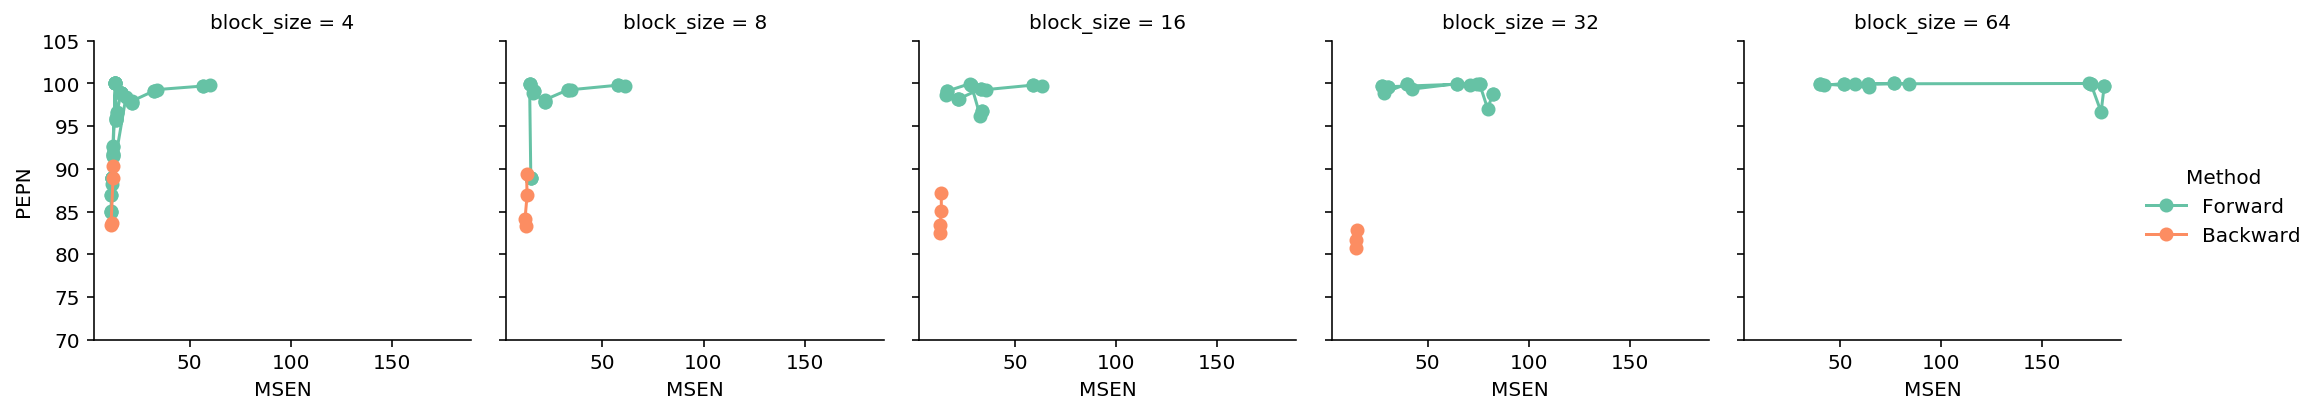

In [164]:
plt.rcParams['figure.figsize'] = [40.0, 13.0]

import seaborn as sns
import matplotlib.pyplot as plt

# Initialize a grid of plots with an Axes for each walk
grid = sns.FacetGrid(df, col="block_size", hue="Method", palette="Set2",
                      height=3)

# Draw a horizontal line to show the starting point
grid.map(plt.axhline, y=0, ls=":", c=".5")

# Draw a line plot to show the trajectory of each random walk
grid.map(plt.plot, "MSEN", "PEPN", marker="o").add_legend()

# Adjust the tick positions and labels
grid.set(ylim=(70, 105))

# Adjust the arrangement of the plots
#grid.fig.tight_layout(w_pad=1)

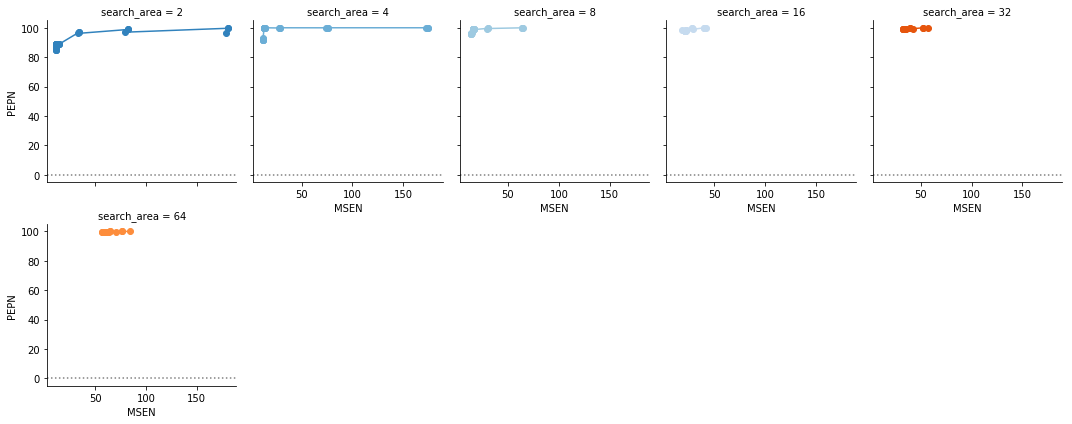

In [94]:
# Initialize a grid of plots with an Axes for each walk
grid = sns.FacetGrid(df, col="search_area", hue="search_area", palette="tab20c",
                     col_wrap=5, height=3)

# Draw a horizontal line to show the starting point
grid.map(plt.axhline, y=0, ls=":", c=".5")

# Draw a line plot to show the trajectory of each random walk
grid.map(plt.plot, "MSEN", "PEPN", marker="o")

# Adjust the tick positions and labels
grid.set()

# Adjust the arrangement of the plots
grid.fig.tight_layout(w_pad=1)

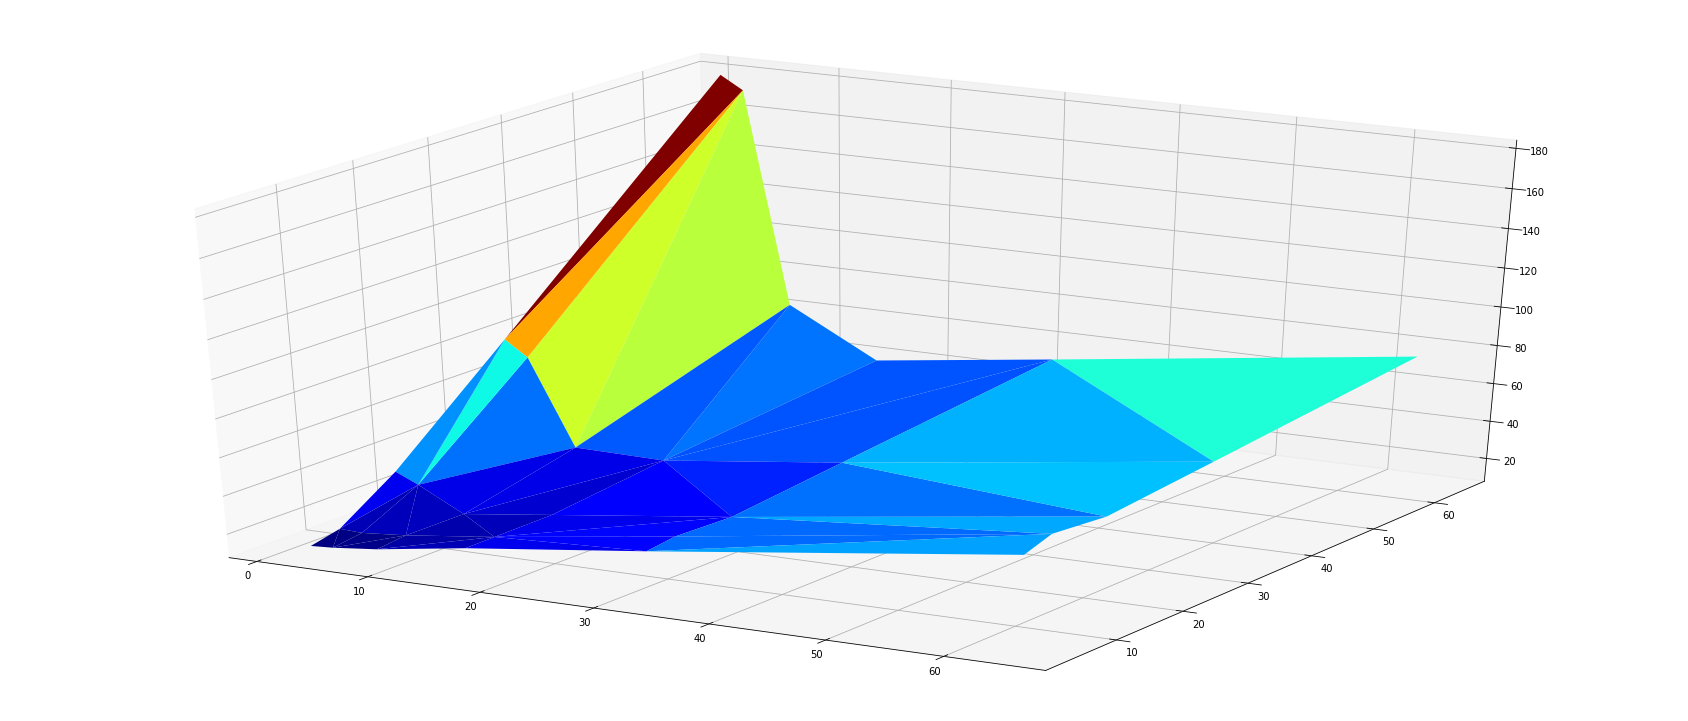

In [93]:
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot_trisurf(df.search_area, df.block_size, df.MSEN, cmap=cm.jet, linewidth=0.2)

plt.show()

# numpy

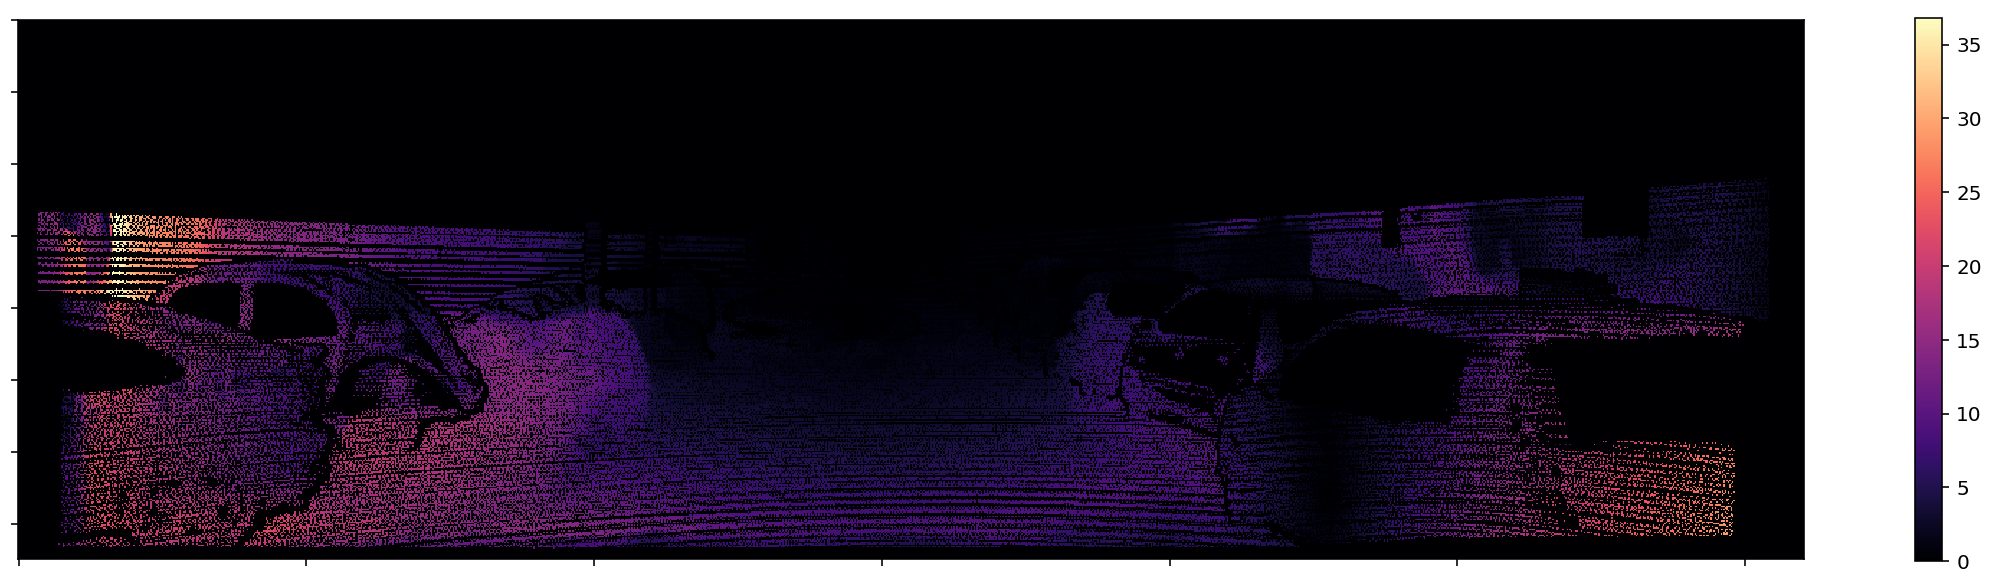

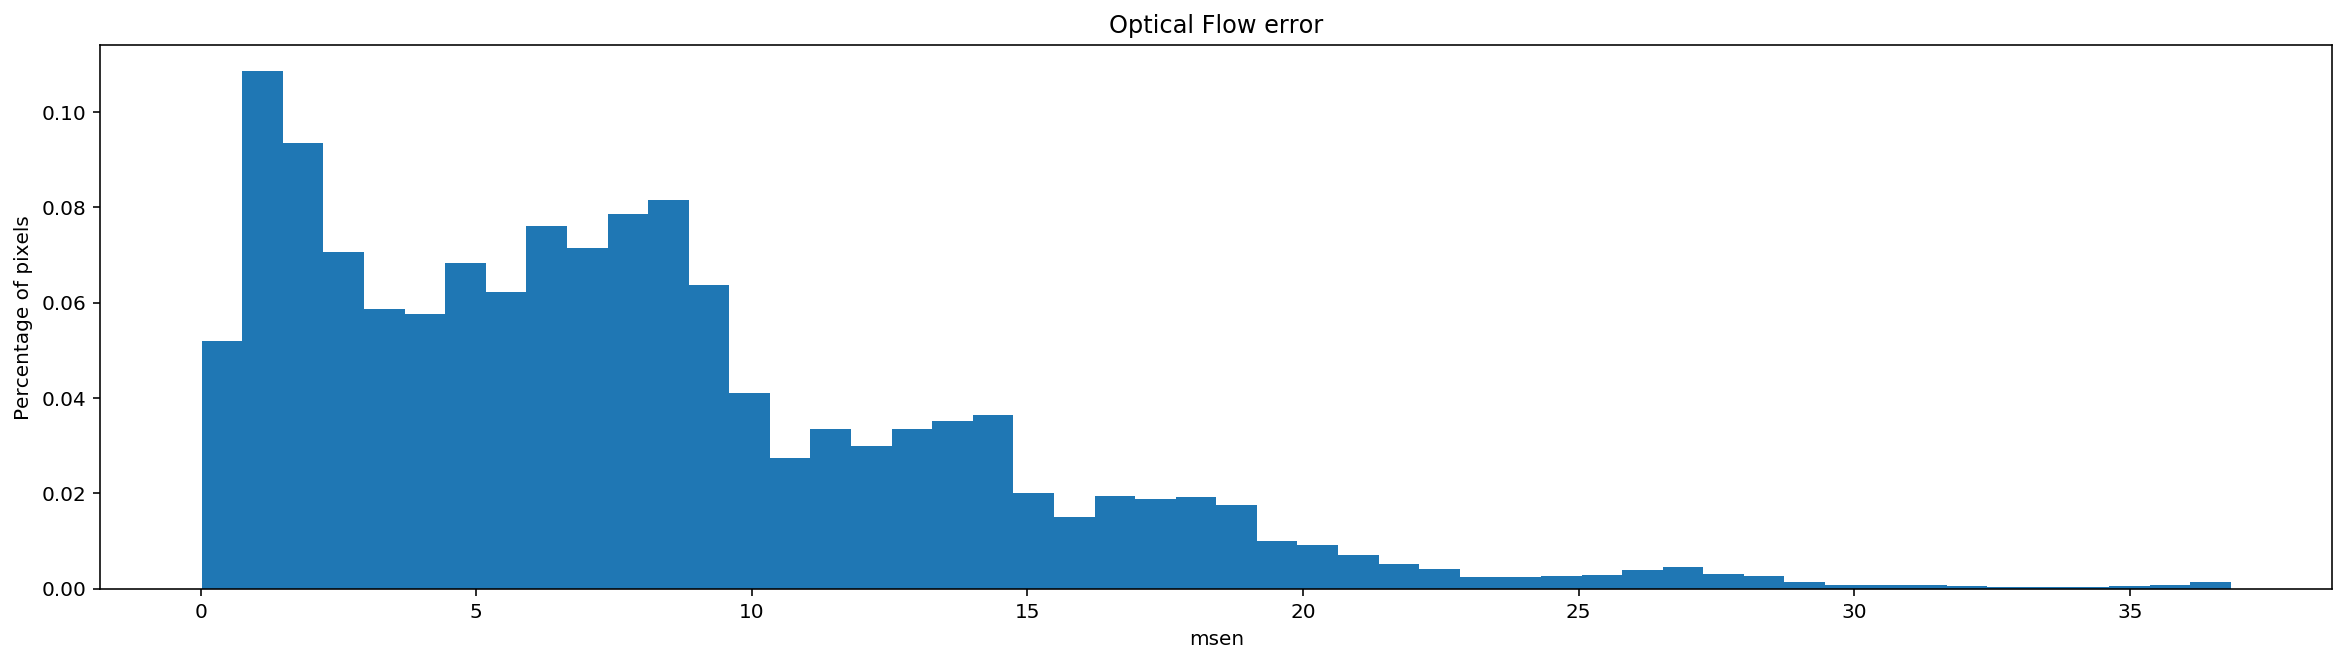

MSEN: 7.99629168107603
PEPN: 75.88708904437841


In [174]:
plt.rcParams['figure.figsize'] = [20.0, 5.0]
#plt.rcParams['figure.figsize'] = [7.0, 5.0]

data = np.load('flow.npy')
msen, pepn = compute_msen(flow_gt[1:,:], data[:,1:])
print("MSEN: {}".format(msen))
print("PEPN: {}".format(pepn))

In [178]:
import os
if os.path.isfile('flow.npy'):
    print("asdf")

asdf
